In [ ]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


%matplotlib inline
plt.style.use('classic')

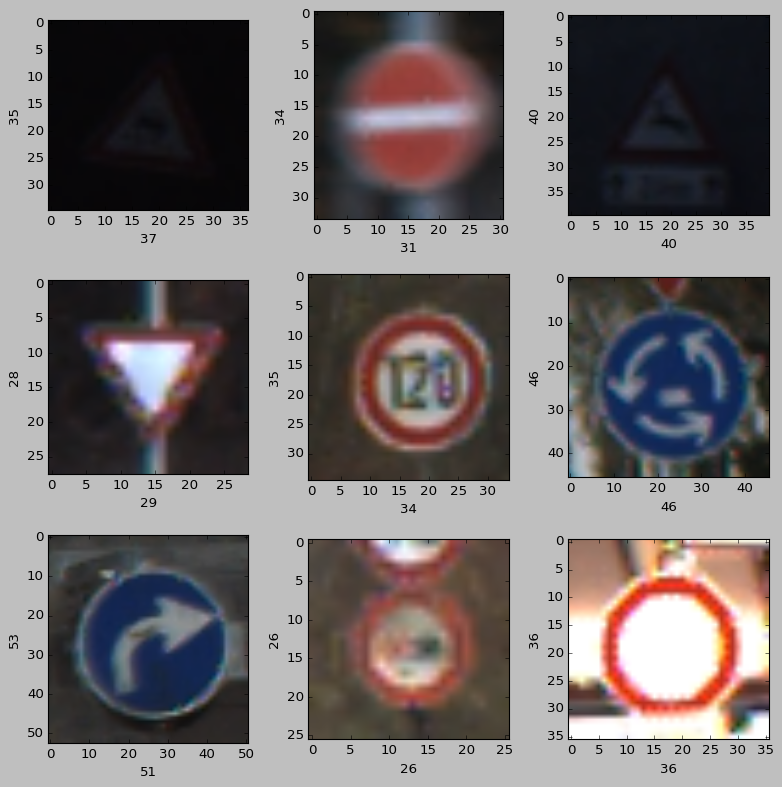

In [ ]:
# display images
import random

plt.figure(figsize=(10,10))

for i in range(1,10):
    plt.subplot(3,3,i)
    plt.tight_layout()
    random_image = plt.imread(random.choice(glob.glob("Test/*.png")))
    plt.imshow(random_image)
    # print(random_image.shape)
    plt.xlabel(random_image.shape[1])
    plt.ylabel(random_image.shape[0])

In [ ]:
# Storing lables
all_labels = ['Speed limit (20km/h)','Speed limit (30km/h)','Speed limit (50km/h)','Speed limit (60km/h)',
              'Speed limit (70km/h)','Speed limit (80km/h)','End of speed limit (80km/h)','Speed limit (100km/h)',
              'Speed limit (120km/h)','No passing','No passing for vechiles over 3.5 metric tons',
              'Right-of-way at the next intersection','Priority road','Yield','Stop','No vechiles',
              'Vechiles over 3.5 metric tons prohibited','No entry','General caution','Dangerous curve to the left',
              'Dangerous curve to the right','Double curve','Bumpy road','Slippery road','Road narrows on the right',
              'Road work','Traffic signals','Pedestrians','Children crossing','Bicycles crossing','Beware of ice/snow',
              'Wild animals crossing','End of all speed and passing limits','Turn right ahead','Turn left ahead',
              'Ahead only','Go straight or right','Go straight or left','Keep right','Keep left','Roundabout mandatory',
              'End of no passing','End of no passing by vechiles over 3.5 metric']

In [ ]:
df = pd.read_csv('Train.csv')
df

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png
...,...,...,...,...,...,...,...,...
39204,52,56,5,6,47,51,42,Train/42/00042_00007_00025.png
39205,56,58,5,5,51,53,42,Train/42/00042_00007_00026.png
39206,58,62,5,6,53,57,42,Train/42/00042_00007_00027.png
39207,63,69,5,7,58,63,42,Train/42/00042_00007_00028.png


In [ ]:
# No. of traffic sign classes
df['ClassId'].nunique()

43

In [ ]:
w = np.mean(df['Width'])
h = np.mean(df['Height'])

print('\nMean Height: {}\nMean Width: {}'.format(h, w))


Mean Height: 50.328929582493814
Mean Width: 50.83587951745773


In [ ]:
# Normalizing images
from PIL import Image

images = []
label_id = []

for i in tqdm(range(43)):
    dir = 'Train/{}'.format(i)
    image_path = glob.glob("{}/*.png".format(dir))
    for j in image_path:
        img = Image.open('{}'.format(j))
        img = img.resize((50,50))
        img = np.array(img)
        img = img / 255.0
        images.append(img)
        label_id.append(i)

#converting images into numpy array
images = np.array(images)
print(images.shape)

100%|██████████| 43/43 [00:20<00:00,  2.15it/s]


(39209, 50, 50, 3)


In [ ]:
label_id = np.array(label_id)
label_id.shape

(39209,)

In [ ]:
# Splitting the dataset
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(images, label_id, test_size=0.2)

In [ ]:
# one-hot encoding
from tensorflow.keras.utils import to_categorical

y_train_cat = to_categorical(y_train)
y_val_cat = to_categorical(y_val)

In [ ]:
# Building Model
# import tensorflow
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPool2D


model = Sequential()

model.add(Conv2D(filters=64, kernel_size=(5,5),input_shape=(50,50,3),activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(filters=64, kernel_size=(5,5),activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(128, activation= 'relu'))
model.add(Dropout(0.5))
model.add(Dense(43, activation= 'softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 64)        4864      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 23, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 23, 23, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 19, 19, 64)        102464    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 9, 9, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 9, 9, 64)          0

In [ ]:
# Training the Model

history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data= (X_val,y_val))

Epoch 1/10
491/491 [==============================] - 18s 14ms/step - loss: 2.0143 - accuracy: 0.4428 - val_loss: 0.5511 - val_accuracy: 0.8877
Epoch 2/10
491/491 [==============================] - 6s 12ms/step - loss: 0.7858 - accuracy: 0.7484 - val_loss: 0.2092 - val_accuracy: 0.9522
Epoch 3/10
491/491 [==============================] - 7s 14ms/step - loss: 0.5281 - accuracy: 0.8282 - val_loss: 0.1360 - val_accuracy: 0.9732
Epoch 4/10
491/491 [==============================] - 7s 14ms/step - loss: 0.4195 - accuracy: 0.8618 - val_loss: 0.1015 - val_accuracy: 0.9815
Epoch 5/10
491/491 [==============================] - 7s 14ms/step - loss: 0.3540 - accuracy: 0.8865 - val_loss: 0.0641 - val_accuracy: 0.9871
Epoch 6/10
491/491 [==============================] - 8s 16ms/step - loss: 0.2989 - accuracy: 0.9031 - val_loss: 0.0590 - val_accuracy: 0.9872
Epoch 7/10
491/491 [==============================] - 7s 15ms/step - loss: 0.2645 - accuracy: 0.9153 - val_loss: 0.0430 - val_accuracy: 0.990

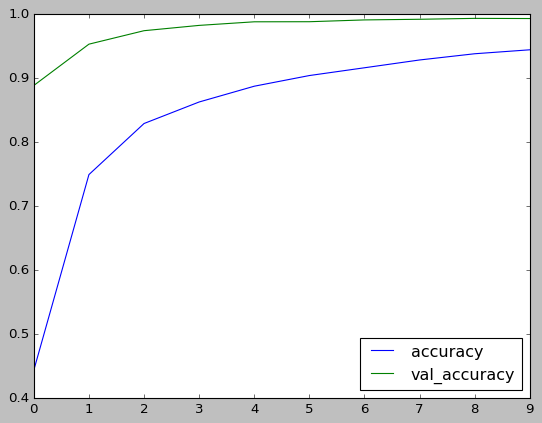

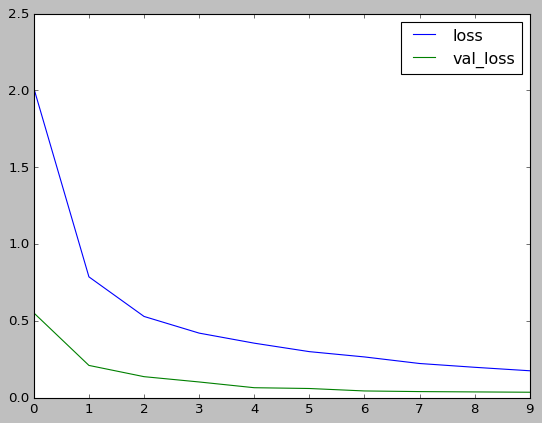

In [ ]:
evaluation = pd.DataFrame(model.history.history)
evaluation[['accuracy','val_accuracy']].plot()
evaluation[['loss','val_loss']].plot()

In [ ]:
test_path = 'Test'

In [ ]:
# Scaling Test images

def scaling(image_path):
  images = []

  for i in image_path:
    img = Image.open('{}'.format(i))
    img = img.resize((50, 50))
    img = np.array(img)
    img = img / 255.0
    images.append(img)

  #converting images to numpy array
  images = np.array(images)

  return images


In [ ]:
X_test = scaling(sorted(glob.glob('{}/*.png'.format(test_path))))

In [ ]:
test = pd.read_csv('Test.csv')
test.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png
3,27,29,5,5,22,24,33,Test/00003.png
4,60,57,5,5,55,52,11,Test/00004.png


In [ ]:
y_test = test['ClassId'].values
y_test

array([16,  1, 38, ...,  6,  7, 10])

In [ ]:
# Prediction

y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([16,  1, 38, ...,  6,  7, 10])

In [ ]:
score = model.evaluate(X_test, y_test)
print('Accuracy over test set: ',round((score[1]*100), 2),"%" )

395/395 [==============================] - 2s 4ms/step - loss: 0.1507 - accuracy: 0.9631
Accuracy over test set:  96.31 %


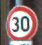

In [ ]:
Image.open('{}/00001.png'.format(test_path))

In [ ]:
# Print original label & Predicted label of the Image
print('Original label: {}'.format(all_labels[y_test[1]]))

print('\nPredicted label: {}'.format(all_labels[y_pred[1]]))

Original label: Speed limit (30km/h)

Predicted label: Speed limit (30km/h)


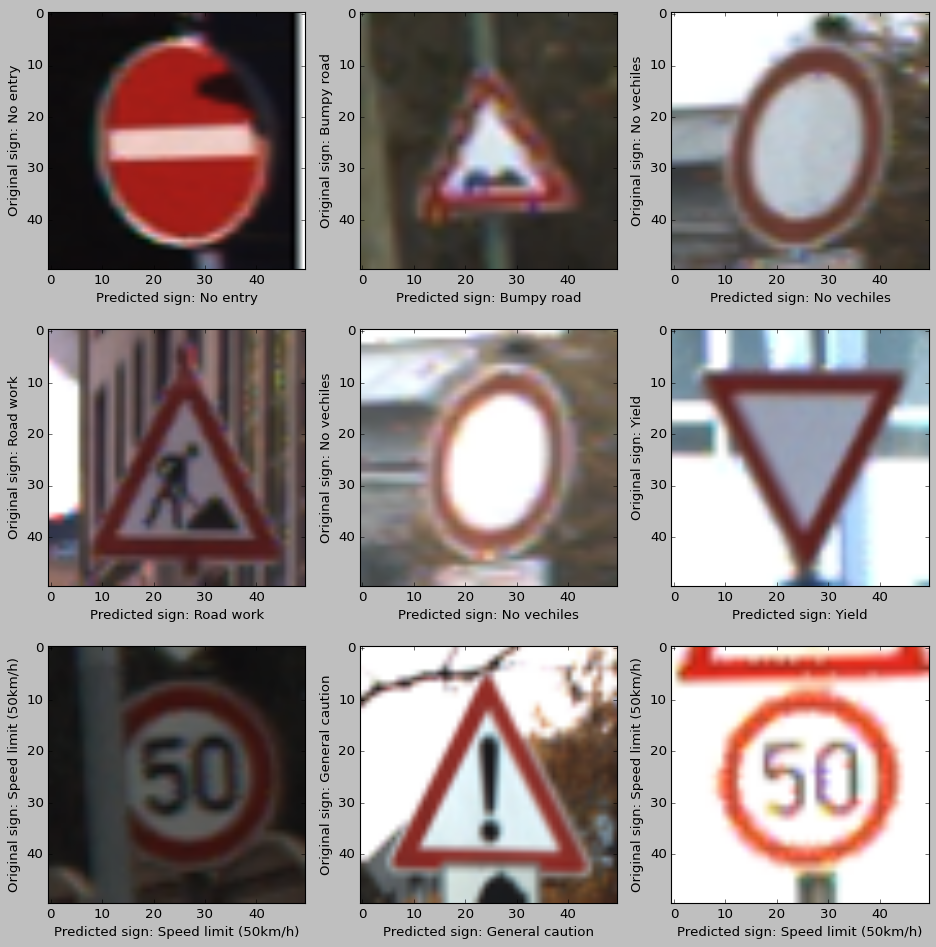

In [ ]:
# Predict test images

plt.figure(figsize=(12,12))

for i in range(1,10):
    plt.subplot(3,3,i)
    plt.tight_layout()
    indx = random.randint(0, len(y_test))
    plt.imshow(X_test[indx])


    # print(random_image.shape)
    plt.ylabel('Original sign: '+all_labels[y_test[indx]])
    plt.xlabel('Predicted sign: '+all_labels[y_pred[indx]])

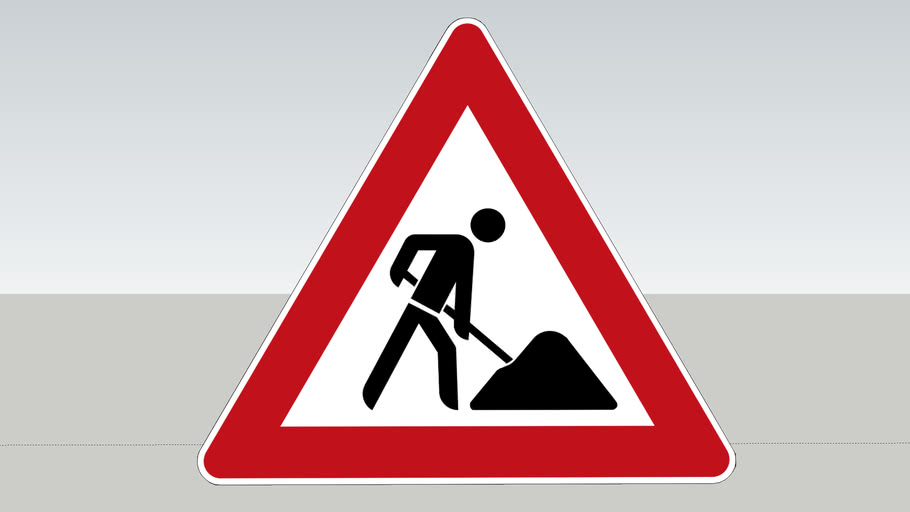

In [ ]:
# Prediction on new image
img_path = 'sign.jpg'
img = Image.open(img_path)
img

In [ ]:
img = img.resize((50, 50))
img = np.array(img)
img = img / 255.0
img = np.expand_dims(img, axis = 0)

In [ ]:
all_labels[np.argmax(model.predict(img))]

'Road work'